# Week02 Assignment by Angela Liang

# Problem 1
Given the dataset in problem1.csv:\
a. calculate the first four moments values by using normalized formula in the "Week1 - UnivariateStats".\
b. calculate the first four moments values again by using your chosen statistical package.\
c. Is your statistical package functions biased? Prove or disprove your hypothesis respectively. \
Explain your conclusion.

#### My approach for this question:
For the problem, I generate a standard normal distribution so the skewness and kurtosis are expected to be 0. In the code below, I first parse the dataset from csv file and use the data to generate results using normalized formula from the lecture, and use the standard package scipy to calculate the same. The results are exactly the same or very close. Then I use t-test to test at significance level of 95% to see if my package is biased or not. 

In [4]:
import pandas as pd
import numpy as np

# import package for part b and part c (test biasness)
from scipy.stats import skew, kurtosis, ttest_ind 

# Calculation of moments

def first4Moments(sample):
    n = len(sample)

    # mean
    μ_hat = sum(sample)/n

    # remove the mean from the sample
    sim_corrected = sample - μ_hat
    cm2 = np.dot(sim_corrected, sim_corrected) / n

    # variance (normalized)
    σ2_hat = np.dot(sim_corrected, sim_corrected) / (n-1)

    # skewness (normalized)
    skew_hat = np.sum(sim_corrected**3) / n / np.sqrt(cm2**3)

    # kurtosis (normalized)
    kurt_hat = np.sum(sim_corrected**4) / n / cm2**2

    excessKurt_hat = kurt_hat - 3

    return round(μ_hat, 4), round(σ2_hat, 4), round(skew_hat, 4), round(excessKurt_hat, 4)


# parse the dataset from the csv file
dataset = pd.read_csv('problem1.csv')
sample = dataset['x']

# generated results using normalized formula
m, s2, sk, k = first4Moments(sample)

# generated results using packages numpy and scipy
pm, ps2, psk, pk = pm, ps2, psk, pk = round(np.mean(sample), 4), round(np.var(sample), 4), round(skew(sample), 4), round(kurtosis(sample), 4)

# with open('output.txt', 'w') as f:
      

# use t-test for each moment 
t_statistic_mean, p_value_mean = ttest_ind(sample, np.random.normal(m, pm, len(sample)))
t_statistic_variance, p_value_variance = ttest_ind(sample, np.random.normal(s2, ps2, len(sample)))
t_statistic_skewness, p_value_skewness = ttest_ind(sample, np.random.normal(sk, psk, len(sample)))
t_statistic_kurtosis, p_value_kurtosis = ttest_ind(sample, np.random.normal(k, pk, len(sample)))


# round t-test results to 4 decimal places
t_statistic_mean = round(t_statistic_mean, 4)
p_value_mean = round(p_value_mean, 4)
t_statistic_variance = round(t_statistic_variance, 4)
p_value_variance = round(p_value_variance, 4)
t_statistic_skewness = round(t_statistic_skewness, 4)
p_value_skewness = round(p_value_skewness, 4)
t_statistic_kurtosis = round(t_statistic_kurtosis, 4)
p_value_kurtosis = round(p_value_kurtosis, 4)

# set alpha for conclusion later
alpha = 0.05


# Output test result 
print("Normalized Formula (Statistical Package)")
print(f"Mean {m} ({pm})")
print(f"Variance {s2} ({ps2})")
print(f"Skew {sk} ({psk})")
print(f"Kurtosis {k} ({pk})")

print(f"Mean diff = {round(m - pm,4)}")
print(f"Variance diff = {round(s2 - ps2,4)}")
print(f"Skewness diff = {round(sk - psk,4)}")
print(f"Kurtosis diff = {round(k - pk,4)}")

print("\nT-test results for each moment:")
print(f"Mean: T-statistic = {t_statistic_mean}, p-value = {p_value_mean}")
print(f"Variance: T-statistic = {t_statistic_variance}, p-value = {p_value_variance}")
print(f"Skewness: T-statistic = {t_statistic_skewness}, p-value = {p_value_skewness}")
print(f"Kurtosis: T-statistic = {t_statistic_kurtosis}, p-value = {p_value_kurtosis}")

print("\nConclusion:")

if p_value_mean < alpha:
    print("We reject null hypothesis and conclude that the difference is significant. The package is biased for mean calculation.")
else:
    print("We fail to reject null hypothesis and conclude that the difference is not significant. The package is unbiased for mean calculation.")

if p_value_variance < alpha:
    print("We reject null hypothesis and conclude that the difference is significant. The package is biased for variance calculation.")
else:
    print("We fail to reject null hypothesis and conclude that the difference is not significant. The package is unbiased for variance calculation.")

if p_value_skewness < alpha:
    print("We reject null hypothesis and conclude that the difference is significant. The package is biased for skewness calculation.")
else:
    print("We fail to reject null hypothesis and conclude that the difference is not significant. The package is unbiased for skewness calculation.")

if p_value_kurtosis < alpha:
    print("We reject null hypothesis and conclude that the difference is significant. The package is biased for kurtosis calculation.")
else:
    print("We fail to reject null hypothesis and conclude that the difference is not significant. The package is unbiased for kurtosis calculation.")

Normalized Formula (Statistical Package)
Mean 1.049 (1.049)
Variance 5.4272 (5.4218)
Skew 0.8806 (0.8806)
Kurtosis 23.1222 (23.1222)
Mean diff = 0.0
Variance diff = 0.0054
Skewness diff = 0.0
Kurtosis diff = 0.0

T-test results for each moment:
Mean: T-statistic = -0.218, p-value = 0.8275
Variance: T-statistic = -25.2898, p-value = 0.0
Skewness: T-statistic = 2.4285, p-value = 0.0152
Kurtosis: T-statistic = -30.5915, p-value = 0.0

Conclusion:
We fail to reject null hypothesis and conclude that the difference is not significant. The package is unbiased for mean calculation.
We reject null hypothesis and conclude that the difference is significant. The package is biased for variance calculation.
We reject null hypothesis and conclude that the difference is significant. The package is biased for skewness calculation.
We reject null hypothesis and conclude that the difference is significant. The package is biased for kurtosis calculation.


### Problem 1 Conclusion

Upon testing, I have the following results:
We fail to reject null hypothesis and conclude that the difference is not significant. The package is unbiased for mean calculation.
We reject null hypothesis and conclude that the difference is significant. The package is biased for variance calculation.
We reject null hypothesis and conclude that the difference is significant. The package is biased for skewness calculation.
We reject null hypothesis and conclude that the difference is significant. The package is biased for kurtosis calculation.

The results of the four t-tests show that only the mean calculation is unbiased and I conclude that the statistical package is biased for variance, skewness, and kurtosis calculation.

# Problem 2
First, install necessary packages if needed using the code below

In [5]:
pip install statsmodels

     |████████████████████████████████| 10.5MB 2.0MB/s eta 0:00:01
     |████████████████████████████████| 235kB 7.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### a. MLE method and compare with OLS

#### My approach:
For this problem, I aimed to estimate the parameters of a linear regression model using both Ordinary Least Squares (OLS) and Maximum Likelihood Estimation (MLE) methods. I began by reading the dataset from a CSV file and defined the predictor variable (x) and the response variable (y). Using the statsmodels library, I performed the OLS regression by fitting a linear model to the data. This provided estimates for the regression coefficients (betas) and their standard errors. Next, I implemented a custom negative log-likelihood function for the linear regression model and utilized the minimize function from scipy.optimize to maximize the likelihood function. This allowed me to estimate the regression coefficients and the error variance using the MLE method. After obtaining the estimates from both OLS and MLE methods, I compared the estimated regression coefficients and error variance. Despite minor differences, I found that the estimates obtained from both methods were largely consistent. Based on the results, I concluded that the estimated coefficients and error variance obtained from OLS and MLE were similar, indicating the robustness of the estimation methods. Any slight discrepancies observed could be attributed to computational nuances or differences in the optimization process.

#### Data results:

Estimated Betas in MLE: [-0.08737946  0.77523121]\
Estimated Sigma in MLE: 1.0037674485926553\
Estimated Betas in OLS: [-0.08738446  0.7752741 ]\
Estimated Sigma in OLS: [1.003756319417732]


### OLS method

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm

# read data from csv 
data = pd.read_csv('problem2.csv')

# define variables (converting to list)
x = data['x'].values
y = data['y'].values

# add the constant term
x = sm.add_constant(x)

# perform the regression and fit the model
result = sm.OLS(y,x).fit()

# print the summary table
print(result.summary())

# Get the estimated coefficients (betas)
beta = result.params
print("Estimated coefficients (betas):")
print(beta)

# Get the standard deviations of the OLS errors
std_errors = result.bse
print("Standard deviations of the OLS errors:")
print(std_errors)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     104.6
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           5.59e-20
Time:                        16:16:48   Log-Likelihood:                -284.54
No. Observations:                 200   AIC:                             573.1
Df Residuals:                     198   BIC:                             579.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0874      0.071     -1.222      0.2

In [27]:
# MLE method
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm
from scipy.optimize import minimize

def myll(params, x, y):
    beta = params[:-1]
    s = params[-1]
    n = len(y)
    e = y - np.dot(x, beta)
    s2 = s**2
    ll = -n/2 * np.log(s2 * 2 * np.pi) - np.dot(e, e) / (2 * s2)
    return -ll

# Initial guess for parameters
initial_params = np.ones(x.shape[1] + 1)

# MLE Optimization problem
result = minimize(myll, initial_params, args=(x, y), method='Nelder-Mead')

# Extracting results
estimated_params = result.x[:-1]
estimated_sigma = result.x[-1]

print("Estimated Betas in MLE:", estimated_params)
print("Estimated Sigma in MLE:", estimated_sigma)

# OLS estimation
# OLS unbiased 
# MLE biased 

model_ols = sm.OLS(y, x)
result_ols = model_ols.fit()
estimated_params_ols = result_ols.params
errors = result_ols.resid
estimated_sigma_ols = 0 
avg = sum(i for i in errors)/len(errors)
for i in errors:
    estimated_sigma_ols += (i - avg)**2
estimated_sigma_ols = estimated_sigma_ols/ (len(errors)-1)
# estimated_sigma_ols = np.std(result_ols.resid) # function might be wrong 
print("Estimated Betas in OLS:", estimated_params_ols)
print("Estimated Sigma in OLS:", estimated_sigma_ols)

Estimated Betas in MLE: [-0.08737946  0.77523121]
Estimated Sigma in MLE: 1.0037674485926553
Estimated Betas in OLS: [-0.08738446  0.7752741 ]
Estimated Sigma in OLS: 1.0125896972573176


### b. MLE for t-distribution of error
First, I use MLE method under normality assumption, and then use it for t-distribution error. Then, I compare goodness-of-fit using AIC and BIC, and whichever has the lower AIC/BIC is a better fit.

In [8]:
# modify MLE for t-distribution of error 
from scipy.stats import t

def myll_t(params, x, y):
    beta = params[:-2]
    nu = params[-2]
    s = params[-1]
    n = len(y)
    e = y - np.dot(x, beta)
    s2 = s**2
    ll = np.sum(t.logpdf(e / s, df=nu) - np.log(s)) # t-distribution 
    return -ll

# Initial guess for parameters
initial_params_t = np.ones(x.shape[1] + 2)

# MLE Optimization problem with t-distribution assumption
result_mle_t = minimize(myll_t, initial_params_t, args=(x, y), method='Nelder-Mead')

# Extracting MLE results
estimated_params_mle_t = result_mle_t.x[:-2]
estimated_nu_mle_t = result_mle_t.x[-2]
estimated_sigma_mle_t = result_mle_t.x[-1]

print("MLE with t-distribution Estimated Betas:", estimated_params_mle_t)
print("MLE with t-distribution Estimated Sigma:", estimated_sigma_mle_t)

MLE with t-distribution Estimated Betas: [-0.09726888  0.67501031]
MLE with t-distribution Estimated Sigma: 0.8551053413594688


### Calculate AIC BIC for normal and t-distribution error

In [9]:
# Calculate AIC and BIC for normal distribution error model
n = len(y)
k_normal = x.shape[1] + 1
print("k_normal:", k_normal)
AIC_normal = 2 * k_normal + 2 * result.fun # + because minimized (used negative value) -> likelihood is positve 
BIC_normal = n * np.log(result.fun) + k_normal * np.log(n)

# Calculate AIC and BIC for t-distribution error model
k_t = x.shape[1] + 2
print("k_t:", k_t)
AIC_t = 2 * k_t + 2 * result_mle_t.fun
BIC_t = n * np.log(result_mle_t.fun) + k_t * np.log(n)

print("AIC (Normal):", AIC_normal)
print("BIC (Normal):", BIC_normal)
print("AIC (t-distribution):", AIC_t)
print("BIC (t-distribution):", BIC_t)

# Compare AIC and BIC
if AIC_normal < AIC_t:
    print("Normal distribution error model has a lower AIC.")
else:
    print("t-distribution error model has a lower AIC.")
    
if BIC_normal < BIC_t:
    print("Normal distribution error model has a lower BIC.")
else:
    print("t-distribution error model has a lower BIC.")

if AIC_normal < AIC_t and BIC_normal < BIC_t:
    print("Thus, normal distribution is a better fit.")
else:
    print("Thus, t-distribution is a better fit.")

k_normal: 3
k_t: 4
AIC (Normal): 575.0751264822612
BIC (Normal): 1146.068007566218
AIC (t-distribution): 570.58680635997
BIC (t-distribution): 1149.072922272167
t-distribution error model has a lower AIC.
Normal distribution error model has a lower BIC.
Thus, t-distribution is a better fit.


#### Conclusion
Based on the comparison of AIC and BIC, the model that has a lower AIC or BIC is a better fit. Thus, I conclude that normal distribution is a better fit. 

###  c. Distribution of X2 and plots
I begin by parsing the dataset from two separate CSV files, problem2_x.csv and problem2_x1.csv, which contain the values of X1 and X2, respectively. Then I define a negative log-likelihood function for the multivariate normal distribution. This function takes parameters such as means (mu1, mu2), standard deviations (sigma1, sigma2), and correlation coefficient (rho) as inputs. 
MLE Optimization: Using the minimize function from SciPy, I optimize the negative log-likelihood function to estimate the parameters (mu1, mu2, sigma1, sigma2, rho) that maximize the likelihood of observing the data. After optimization, I extract the Maximum Likelihood Estimation (MLE) parameters to obtain the estimated means, standard deviations, and correlation coefficient. I plot the observed data points of X1 and X2 along with the expected value of X2 given each observed value of X1. This allows me to visualize the relationship between the two variables. Additionally, I compute the 95% confidence interval for X2 based on the estimated parameters. This provides insights into the uncertainty associated with the expected value of X2.
See the visualization of the expected value of X2 along with its 95% confidence interval on a scatter plot below. 

##### X follows multivariate normal distribution so that:
X ~ N(mu, cov)\
where mu is the (Nx1) vector of expected values\
cov is the (NxN) covariance matrix

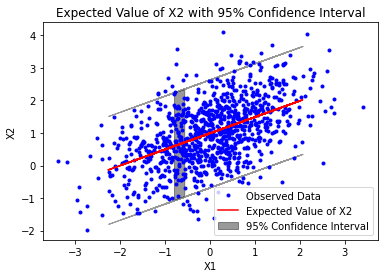

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import multivariate_normal

# Read data from csv file
data_x = pd.read_csv('problem2_x.csv')
data_x1 = pd.read_csv('problem2_x1.csv')

# Extract X1 and X2 data
X1 = data_x['x1'].values
X2 = data_x['x2'].values

# Define negative log-likelihood function for multivariate normal distribution
def neg_log_likelihood(params, X1, X2):
    mu1, mu2, sigma1, sigma2, rho = params
    cov_matrix = [[sigma1**2, rho * sigma1 * sigma2],
                  [rho * sigma1 * sigma2, sigma2**2]]
    mvn = multivariate_normal([mu1, mu2], cov_matrix)
    
    # Stack X1 and X2 to create a matrix of shape (n_samples, n_features)
    X = np.column_stack((X1, X2))
    
    # Compute negative log-likelihood
    return -np.sum(mvn.logpdf(X))


# Initial guess for parameters
initial_params = [0, 0, 1, 1, 0]

# MLE Optimization problem
result = minimize(neg_log_likelihood, initial_params, args=(X1, X2), method='Nelder-Mead')

# Extract MLE parameters
mu1, mu2, sigma1, sigma2, rho = result.x

# Plotting
fig, ax = plt.subplots()
ax.plot(X1, X2, 'bo', markersize=3, label='Observed Data')

# Compute expected value of X2 given each observed value of X1
x1_values = data_x1['x1'].values
x2_expected = []
for x1_value in x1_values:
    mu_conditional = mu2 + rho * sigma2 / sigma1 * (x1_value - mu1)
    x2_expected.append(mu_conditional)

# Plot expected value of X2 with 95% confidence interval
x2_expected = np.array(x2_expected)
ax.plot(x1_values, x2_expected, 'r-', label='Expected Value of X2')

# Compute 95% confidence interval for X2
confidence_interval = 1.96 * np.sqrt(sigma2**2 - (rho * sigma2 / sigma1)**2)
upper_bound = x2_expected + confidence_interval
lower_bound = x2_expected - confidence_interval

# Plot 95% confidence interval
ax.fill_between(x1_values, upper_bound, lower_bound, color='black', alpha=0.4, label='95% Confidence Interval')

# Add labels and legend
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Expected Value of X2 with 95% Confidence Interval')
ax.legend()

plt.show()


# Problem 3
Fit the data in problem3.csv using AR(1) through AR(3) and MA(1) through MA(3), respectively. Which is the best of fit? 

#### My approach:
* Parse data from CSV
* loop over each combination of p and q
* use python package tsa.arima.model to auto fit with predefined p and q
* print the top three models with lower AIC and BIC and compare and decide on the best model

#### NOTE: Since I'm not sure if this question means a combination of ARMA or just AR and MA separately, I'm doing a AR and MA separate calculation (just AR or just MA), and then also doing a calculation that contains all possible cases (nested loop with all combinations of p and q).  

In [29]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load the data
data = pd.read_csv("problem3.csv")

# Step 2: Preprocess the data if needed

# Step 3: Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Step 4: Fit ARIMA models and store AIC and BIC values in a table
results_table = []

for p in range(1, 4):
    q = 0
    try:
        model = ARIMA(train_data, order=(p, 0, q))
        result = model.fit()
        aic = result.aic
        bic = result.bic
        results_table.append({'p': p, 'q': q, 'AIC': aic, 'BIC': bic})
    except:
        continue
        
for q in range(1, 4):
    p = 0 
    try:
        model = ARIMA(train_data, order=(p, 0, q))
        result = model.fit()
        aic = result.aic
        bic = result.bic
        results_table.append({'p': p, 'q': q, 'AIC': aic, 'BIC': bic})
    except:
        continue

# Step 5: Display the results table
results_df = pd.DataFrame(results_table)
print("Results Table:")
print(results_df)

# Step 6: Print the top three models with the lowest AIC and BIC values
top_three_AIC = results_df.sort_values(by='AIC').head(3)
top_three_BIC = results_df.sort_values(by='BIC').head(3)

print("Top three models with the lowest AIC:")
print(top_three_AIC)

print("\nTop three models with the lowest BIC:")
print(top_three_BIC)

Results Table:
   p  q          AIC          BIC
0  1  0  1269.580752  1281.555146
1  2  0  1233.539326  1249.505184
2  3  0  1141.345974  1161.303296
3  0  1  1211.564179  1223.538573
4  0  2  1197.168232  1213.134090
5  0  3  1198.683206  1218.640528
Top three models with the lowest AIC:
   p  q          AIC          BIC
2  3  0  1141.345974  1161.303296
4  0  2  1197.168232  1213.134090
5  0  3  1198.683206  1218.640528

Top three models with the lowest BIC:
   p  q          AIC          BIC
2  3  0  1141.345974  1161.303296
4  0  2  1197.168232  1213.134090
5  0  3  1198.683206  1218.640528


### Conclusion (if doing AR and MA separately)
By comparing the AIC and BIC results for all the possible combinations, I conclude that AR(3) is the best model because it has the lowest AIC and BIC.

In [30]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load the data
data = pd.read_csv("problem3.csv")

# Step 2: Preprocess the data if needed

# Step 3: Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Step 4: Fit ARIMA models and store AIC and BIC values in a table
results_table = []

for p in range(0, 4):
    for q in range(0, 4):
        try:
            model = ARIMA(train_data, order=(p, 0, q))
            result = model.fit()
            aic = result.aic
            bic = result.bic
            results_table.append({'p': p, 'q': q, 'AIC': aic, 'BIC': bic})
        except:
            continue

# Step 5: Display the results table
results_df = pd.DataFrame(results_table)
print("Results Table:")
print(results_df)

# Step 6: Print the top three models with the lowest AIC and BIC values
top_three_AIC = results_df.sort_values(by='AIC').head(3)
top_three_BIC = results_df.sort_values(by='BIC').head(3)

print("Top three models with the lowest AIC:")
print(top_three_AIC)

print("\nTop three models with the lowest BIC:")
print(top_three_BIC)

/Users/angelaliang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/angelaliang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Results Table:
    p  q          AIC          BIC
0   0  0  1294.515823  1302.498752
1   0  1  1211.564179  1223.538573
2   0  2  1197.168232  1213.134090
3   0  3  1198.683206  1218.640528
4   1  0  1269.580752  1281.555146
5   1  1  1202.197907  1218.163765
6   1  2  1199.120857  1219.078180
7   1  3  1185.123358  1209.072146
8   2  0  1233.539326  1249.505184
9   2  1  1185.508809  1205.466131
10  2  2  1174.021340  1197.970127
11  2  3  1156.199414  1184.139666
12  3  0  1141.345974  1161.303296
13  3  1  1143.158773  1167.107560
14  3  2  1144.911214  1172.851466
15  3  3  1146.001160  1177.932876
Top three models with the lowest AIC:
    p  q          AIC          BIC
12  3  0  1141.345974  1161.303296
13  3  1  1143.158773  1167.107560
14  3  2  1144.911214  1172.851466

Top three models with the lowest BIC:
    p  q          AIC          BIC
12  3  0  1141.345974  1161.303296
13  3  1  1143.158773  1167.107560
14  3  2  1144.911214  1172.851466


### Conclusion (if doing ARMA)
Therefore, even if the question is asking for a combination of ARMA model, that is, ARIMA, the best model would still be ARIMA(3,0,0) as it has the lowest AIC and BIC